# Seoul Bike Trip Duration Prediction

<img src="Features_Description.png" style="float:right;" width="500"/>

### Context
- Trip duration is the most fundamental measure in all modes of transportation. 
- Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. 
- In order to predict the trip duration, data mining techniques are employed in this paper to predict the trip duration of rental bikes in Seoul Bike sharing system. 
- The prediction is carried out with the combination of Seoul Bike data and weather data.

### Content
- The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, 
temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Acknowledgements
- V E, Sathishkumar (2020), "Seoul Bike Trip duration prediction", Mendeley Data, V1, doi: 10.17632/gtfh9z865f.1
- Sathishkumar V E, Jangwoo Park, Yongyun Cho, (2019), Seoul bike trip duration prediction using data mining techniques, IET Intelligent Transport Systems, doi: 10.1049/iet-its.2019.0796

### Goal
- Predict the trip duration

### Steps
- Exploratory Data Analysis (EDA)
- **Data Preprocessing**
- **Feature Selection / Transformation**
- Mahcine Learning Algorithm
- Feature Importance / Engineering
- Hyperparameter Tuning
- Model Deployment

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from helper_functions import *

from timeit import default_timer as timer

## Data

In [2]:
dataset = joblib.load('data/dataset.pkl')

In [3]:
dataset

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601134,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,23,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,23,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,22,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,23,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [4]:
dataset.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))).T

,count,mean,std,min,25%,50%,75%,max
Duration,9.60114e+06,25.8029,25.0433,1,8,16,36,119
Distance,9.60114e+06,3713.52,3956.61,1,1230,2280,4620,33290
PLong,9.60114e+06,37.5476,0.0444138,37.4373,37.5142,37.5469,37.5732,37.6897
PLatd,9.60114e+06,126.991,0.0825707,126.799,126.92,126.994,127.062,127.18
DLong,9.60114e+06,37.5477,0.044453,37.4373,37.5142,37.5465,37.5732,37.6897
DLatd,9.60114e+06,126.991,0.0832373,126.799,126.919,126.995,127.062,127.18
Haversine,9.60114e+06,1.87031,1.99536,0,0.675867,1.2575,2.36381,28.6345
Pmonth,9.60114e+06,7.57875,2.6968,1,6,8,10,12
Pday,9.60114e+06,15.7671,8.74801,1,8,16,23,31
Phour,9.60114e+06,14.378,6.24924,0,10,16,19,23


In [5]:
# Latitude range [-90,90], Longitude range [-180,180]
dataset[['PLatd', 'PLong']] = dataset[['PLong', 'PLatd']]
dataset[['DLatd', 'DLong']] = dataset[['DLong', 'DLatd']]

## Data Preprocessing

### Remove duplicated instances

In [6]:
dataset = dataset.drop_duplicates()

In [7]:
dataset = dataset.reset_index()
dataset.drop(columns=['index'], inplace=True)

In [8]:
dataset

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,126.888359,37.544666,126.888359,37.544666,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,127.003944,37.506199,127.035103,37.551250,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,127.057083,37.544590,127.061096,37.537014,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,127.023560,37.571102,127.034920,37.561447,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,127.015907,37.573242,127.016403,37.565849,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577228,67,6930,127.051308,37.562607,127.051308,37.562607,0.000000,12,31,23,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9577229,58,8320,127.085052,37.511982,127.105942,37.476028,4.402263,12,31,23,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9577230,118,2730,127.003944,37.506199,127.015282,37.514870,1.389156,12,31,22,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9577231,90,17170,126.927467,37.489750,126.901184,37.565903,8.779307,12,31,23,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


### Check for missing values

In [9]:
dataset.isnull().sum().sum()

0

### Removing cols with only one or a few non-zero entry

In [10]:
dataset.drop(columns=['Snow', 'Precip'], inplace=True)

### Remove long and latd cols since Haversine is a function of those cols
[Haversine Wikipedia](https://en.wikipedia.org/wiki/Haversine_formula)

In [11]:
dataset.drop(columns=['PLatd', 'PLong', 'DLatd', 'DLong'], inplace=True)

### Remove redundant cols
Since the trips are within a city, we can drop ```['Dday', 'Dmonth', 'DDweek']``` cols

In [12]:
dataset.drop(columns=['Dday', 'Dmonth', 'DDweek'], inplace=True)

### Remove cols with drop off-timings (potential data leak sources)
drop-off time - pick-up time ~= duration

In [13]:
# dataset.drop(columns=['Dhour', 'Dmin'], inplace=True) # there is some confusion about this

### Check and remove rows with '0' as placeholder entries

In [14]:
dataset = dataset.loc[dataset.Haversine*dataset.Dust*dataset.Wind*dataset.Solar !=0.0]

In [15]:
dataset = dataset.reset_index()
dataset.drop(columns=['index'], inplace=True)

In [16]:
dataset.shape

(5356076, 16)

### Remove outliers

In [17]:
from scipy import stats

z = np.abs(stats.zscore(dataset))
out = np.where(z>3)
len(set(out[0]))

400295

In [18]:
dataset = dataset.drop(index=set(out[0]), axis=0)
dataset.shape

(4955781, 16)

### Reset index before saving the data

In [19]:
dataset = dataset.reset_index()
dataset.drop(columns=['index'], inplace=True)

In [20]:
dataset

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dhour,Dmin,Temp,Wind,Humid,Solar,GroundTemp,Dust
0,72,13620,3.951107,1,1,9,0,0,10,12,-4.3,0.7,39.0,0.15,-3.6,28.0
1,4,1130,0.864268,1,1,9,0,0,9,5,-4.3,0.7,39.0,0.15,-3.6,28.0
2,30,6850,3.787676,1,1,9,1,0,9,31,-4.3,0.7,39.0,0.15,-3.6,28.0
3,4,1080,0.705526,1,1,9,1,0,9,6,-4.3,0.7,39.0,0.15,-3.6,28.0
4,3,630,0.540025,1,1,9,1,0,9,5,-4.3,0.7,39.0,0.15,-3.6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955776,77,8050,2.031104,12,31,18,48,0,20,11,-2.4,1.7,27.0,0.02,-1.4,49.0
4955777,81,7960,2.031104,12,31,18,49,0,20,11,-2.4,1.7,27.0,0.02,-1.4,49.0
4955778,73,2950,0.143801,12,31,18,59,0,20,13,-2.4,1.7,27.0,0.02,-1.4,49.0
4955779,87,1370,0.708871,12,31,18,46,0,20,14,-2.4,1.7,27.0,0.02,-1.4,49.0


### Dump the dataset

In [21]:
joblib.dump(dataset, 'data/dataset_cleaned.pkl')

['data/dataset_cleaned.pkl']

## Feature Transformation

In [22]:
dataset = joblib.load('data/dataset_cleaned.pkl')

### Check for categorical features for encoding

In [23]:
dataset.select_dtypes(include='object').sum()

Series([], dtype: float64)

## Feature Selection

In [24]:
frac = 1
# frac = 0.1

X = dataset.drop(columns='Duration').sample(frac=frac, random_state=42)
y = dataset['Duration'].sample(frac=frac, random_state=42)

In [25]:
from sklearn.model_selection import train_test_split

# train:val:test = 80:10:10
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = \
train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [26]:
X_train.shape, X_val.shape, X_test.shape

((3964624, 15), (495578, 15), (495579, 15))

### Recursive Feature Elimination (RFE)
Multivaraite feature selection method!

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from timeit import default_timer as timer

estimator = RandomForestRegressor(n_estimators=100, n_jobs=-1) 
rfe = RFE(estimator, n_features_to_select=10)

start = timer()
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)
end = timer()

print(f'Time taken: {end-start} s\n')

Time taken: 3781.0762907518074 s



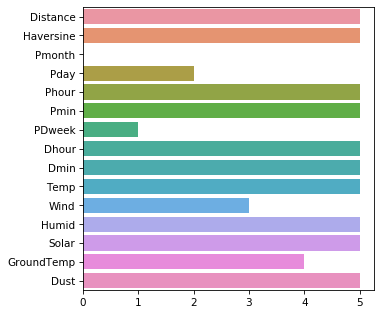

In [29]:
plt.figure(figsize=(5,5), dpi=75)
sns.barplot(y=X_train.columns, x=max(rfe.ranking_)-rfe.ranking_);

In [30]:
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['Distance', 'Haversine', 'Phour', 'Pmin', 'Dhour', 'Dmin', 'Temp',
       'Humid', 'Solar', 'Dust'],
      dtype='object')

In [31]:
X_train_ = pd.DataFrame(X_train, columns=rfe_features)
X_val_ = pd.DataFrame(X_val, columns=rfe_features)
X_test_ = pd.DataFrame(X_test, columns=rfe_features)

In [32]:
joblib.dump(X_train_, 'data/X_train.pkl')
joblib.dump(X_val_, 'data/X_val.pkl')
joblib.dump(X_test_, 'data/X_test.pkl')

joblib.dump(y_train, 'data/y_train.pkl')
joblib.dump(y_val, 'data/y_val.pkl')
joblib.dump(y_test, 'data/y_test.pkl')

['data/y_test.pkl']